# 1. Titanic (Regression)
* https://www.kaggle.com/c/titanic/overview
* 출력을 csv파일로 저장하여 함께 제출
* submit predictions에 테스트해 볼 것!
* 어떠한 알고리즘을 사용하여도 무방함
* 참조: https://www.kaggle.com/alexisbcook/getting-started-with-titanic

In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv ('C:/Users/ff/Documents/MP/train.csv')
test = pd.read_csv ('C:/Users/ff/Documents/MP/test.csv')

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.isnull().sum() # 데이터에 null값이 존재하는지 확인한다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum() # 데이터에 null값이 존재하는지 확인한다.

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
train_data['Embarked'].value_counts() + test['Embarked'].value_counts() # Embarked에서 S가 대부분을 차지함을 확인함.

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [8]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')
# Embarked 전체 데이터셋에서 가장 많이 나온 S로 null 대체한다.

In [9]:
test['Fare'].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace = True)
# Pclass로 그룹을 지어서 1등석, 2등석, 3등석의 요금 중앙값으로 null을 채워넣는다.

In [10]:
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.', expand = False) # 승객의 호칭을 이름에서 추출한다.
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand = False) # 승객의 호칭을 이름에서 추출한다.

In [11]:
train_data['Title'].value_counts() # train_data의 호칭 분포

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Capt          1
Mme           1
Lady          1
Jonkheer      1
Ms            1
Countess      1
Sir           1
Name: Title, dtype: int64

In [12]:
test['Title'].value_counts() # test의 호칭 분포

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [13]:
train_data['Age'].fillna(train_data.groupby("Title")["Age"].transform("median"), inplace = True) 
# null값을 같은 호칭을 가진 사람들의 나이의 평균 값으로 채워넣는다.
test['Age'].fillna(test.groupby("Title")["Age"].transform("median"), inplace = True)
# null값을 같은 호칭을 가진 사람들의 나이의 평균 값으로 채워넣는다.

In [14]:
train_data["Age"].isnull().sum(), test["Age"].isnull().sum() 
# 각 데이터의 null의 갯수를 다시 새었으나 test의 유일한 Ms의 Age가 null이기에 채워지지 않았다.

(0, 1)

In [15]:
train_data[train_data['Title'] == "Ms"]["Age"].value_counts()
# train_data의 Ms의 나이의 평균을 test의 null에 넣어주기 위하여 찾는다.

28.0    1
Name: Age, dtype: int64

In [16]:
test.loc[test["Age"].isnull(),'Age'] = 28 # train_data의 Ms의 나이의 평균을 입력한다.

In [17]:
train_data["Age"].isnull().sum(), test["Age"].isnull().sum() # 각 데이터의 null의 개수.

(0, 0)

In [18]:
train_data.isnull().sum() # train_data에 null값이 존재하는지 다시 확인한다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [19]:
test.isnull().sum() # test에 null값이 존재하는지 다시 확인한다.

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [20]:
PId = test['PassengerId']

In [21]:
target = train_data['Survived'] # train_data의 Survived를 target으로 둔다.
train_data.drop(labels=['PassengerId', 'Name', 'Survived', 'Ticket', 'Cabin', 'Title'], axis=1, inplace=True) 
# train_data의 Name, target으로 지정한 Survived, 티켓의 이름 Ticket, 좌석 Cabin을 제외한다.
test.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Title'], axis=1, inplace=True) 
# test의 ID로 대체가능한 Name, 티켓의 이름 Ticket, 좌석 Cabin을 제외한다.

In [22]:
train_data['Embarked'] = train_data['Embarked'].map({'S':0, 'C':1, 'Q':2})
test['Embarked'] = test['Embarked'].map({'S':0, 'C':1, 'Q':2})
# logistic regression을 위해 탑승장소를 0, 1, 2로 나타낸다.

In [23]:
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
test['Sex'] = test['Sex'].map({'male':0, 'female':1})
# logistic regression을 위해 성별을 0과 1로 나타낸다.

In [24]:
train_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,21.0,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


In [25]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,28.5,0,0,8.0500,0
414,1,1,39.0,0,0,108.9000,1
415,3,0,38.5,0,0,7.2500,0
416,3,0,28.5,0,0,8.0500,0


In [26]:
lr = LogisticRegression(max_iter = 1000) # Logistic Regression을 이용한 train_data 학습
lr.fit(train_data, target)

LogisticRegression(max_iter=1000)

In [27]:
print(lr.predict(test)) # Survived 예측값

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [28]:
predictions = lr.predict(test) 

In [29]:
print(test.head(0)) # 예측에 영향을 주는 항목의 나열

Empty DataFrame
Columns: [Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []


In [30]:
print(lr.coef_) # 각 항목의 기여도

[[-1.11484550e+00  2.58996543e+00 -4.13755867e-02 -3.40168893e-01
  -7.54887753e-02  2.40952381e-03  2.16773584e-01]]


In [31]:
output = pd.DataFrame({'PassengerId': PId, 'Survived': predictions}) # PassengerId와 Survived 예측값을 하나로 합친다.
output.to_csv('C:/Users/ff/Documents/MP/my_submission.csv', index=False) # my_submission.csv로 결과값을 저장한다.
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [32]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


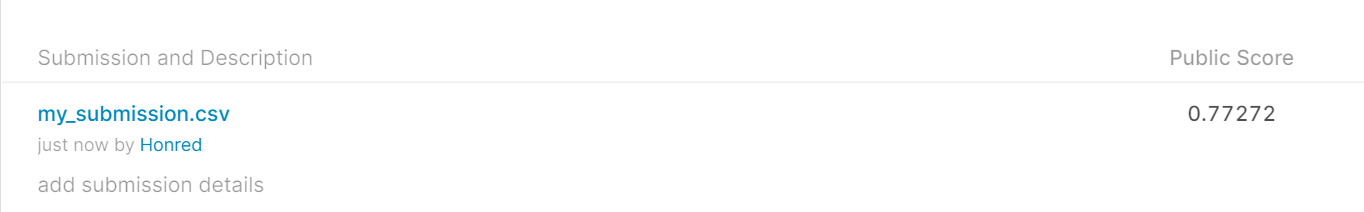